EE 502 P: Analytical Methods for Electrical Engineering
# 8. Probability
## Prof. Eric Klavins, Electrical and Computer Engineering
### 25 September, 2019
Copyright &copy; 2019, University of Washington

In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

# Basics

## Definitions

**Def:** The **sample space**, $\Omega$, of an experiment is the set of outcomes of the experiment. Subsets of $\Omega$ are called **events**.

**Example:** Consider the roll of two fair dice. The outcomes are the set of pairs in. 

$$
\Omega = \{ 1,2,3,4,5,6 \} \times \{ 1,2,3,4,5,6 \}.
$$

An example event is the set of pairs in which the sum of the dice equals 7:

$$
B = \{ (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) \} .
$$

**Def**: A **probability distribution** is a function $P : \mathcal{P}(\Omega) \rightarrow [0,1]$ such that

a) $P[A] \geq 0$

b) $P[\Omega] = 1$

c) $P[A \cup B] = P[A] + P[B]$ whenever $A \cap B = \emptyset$. 

**Example:** The assignment $P[A] = \frac{1}{36}|A|$ is a probability distribution for the dice example above. Property (a) is satisfied because the absolute value is positive. Property (b) is satisfied because there are 36 elements in $\Omega$. Property (c) is satisfied because if $A$ and $B$ are disjoint sets then $|A+B| = |A| + |B|$. 

**Example:** The probability of the event $B$ above (the dice sum to seven) is $P[B] = \frac{6}{36} = \frac{1}{6}$. 

**Other Properties:**

d) $P[\emptyset] = 0$. This is because $P[\Omega \cup \emptyset] = P[\Omega] + P[\emptyset] = 1$ by property (c). Since, by property (b), $P[\Omega] = 1$, it must be the case that $P[\emptyset] = 0$. 

e) $P[A \cap \overline B] = P[A] - P[A \cap B]$. This is because $A \cap B$ and $A \cap \overline{B}$ are disjoint. 

f) $P[A] = 1 - P[\overline{A}]$. Take $A = \Omega$ in (e). 

g) $P[A \cup B] = P[A] + P[B] - P[A \cap B]$ when $A \cap B \neq \emptyset$. This can be shown using (e) along with the fact that $A \cup B$ is equal to 

$$
(A \cap \overline B) \cup (A \cap B) \cup (\overline{A} \cap B).
$$

## Conditional Probability

**Def:** The **probability of $B$ given $A$** is 

$$
P[B\;|\;A] = \frac{P[A\cap B]}{P[A]}. 
$$

It is the probability of the event $B$ given that $A$ has occurred.

**Example:** With our running example of two dice being thrown, suppose that $A$ is the event that the face shown by the first die is even and $B$ is the event that the sum of the two dice is 7. Then

$$
P[A \cap B] = P[ \{ (2,5), (4,3), (6,1) \} ] = \frac{3}{36} = \frac{1}{12}
$$

and

$$
P[A] = P[\{ 2,4,6 \} \times \{ 1,2,3,4,5,6 \}]  = \frac{18}{36} = \frac{1}{2}.
$$

Thus, 

$$
P[B\;|\;A] = \frac{\frac{1}{12}}{\frac{1}{2}} = \frac{1}{6}.
$$

That is, given that the first die comes up even, there is (still) a one in six chance that the sum of the two dice turns out to be seven.

**Example:** The probability that the sum is equal to $a$ given that it is equal to $b$ is 1 if $a=b$ and 0 otherwise.

**Property:** Suppose that $A_1$, .., $A_n$ are $n$ mutually exclusive events whose union is $\Omega$. Then

$$
P[B] = P[B\;|\;A_1] + \dots  + P[B\;|\;A_n] .
$$

**Example:** Suppose $A_i = \{i\} \times \{1,2,3,4,5,6\}$ for $i = 1$ to $6$. Then if $B$ is the probability of getting a seven, we have

\begin{eqnarray}
P[B] & = & P[B\;|\;A_n] + \dots + P[B\;|\;A_n] \\
     & = & \frac{1}{36} + \dots + \frac{1}{36} \\
     & = & \frac{1}{6}.
\end{eqnarray}

##  Independence

**Def:** Two events $A$ and $B$ are **independent** if $P[A \cap B] = P[A]P[B]$. 

**Property:** If $A$ and $B$ are independent, then $P[B \;|\; A] = P[B]$.

## Bayes Theorem

**Theorem:** Let $A$ and $B$ be events. Then
    
$$
P[A \;|\; B] = \frac{P[B\;|\;A]P[A]}{P[B]}.
$$

**Example:** (Stark and Woods p. 21) Suppose there is a test for cancer with the following properties

- $A$ = the event that the test says the person has cancer
- $B$ = the event that the person actually has cancer

Suppose that 

- $P[A \;|\; B] = 0.95$: Test returns true if patient has cancer.
- $P[\overline{A} \;|\; \overline{B}] = 0.95$ Test returns false if patient does not have cancer.
- $P[B] = 0.005$.

Is this a good test?

To answer this question, we look at the probability that the person has cancer given the test comes up positive. That is,

\begin{eqnarray}
P[B \;|\; A] & = & \frac{P[A\;|\;B]P[B]}{P[A]} \\
             & = & \frac{P[A\;|\;B]P[B]}{P[A\;|\;B]P[B] + P[A\;|\;\overline{B}]P[\overline{B}]}
\end{eqnarray}

where we have expanded $P[A]$ using the conditional probability property above. To compute $P[A \;|\; \overline{B}]$ note that

$$
P[\overline{A} \;|\; \overline{B}] = 
\frac{P[\overline{A} \cap \overline{B}]}{P[\overline{B}]} = \frac{P[\overline{B}] - P[A \cap \overline{B}]}{P[\overline{B}]} = 1 - P[A\;|\;\overline{B}]
$$

using property (e). Thus, 

\begin{eqnarray}
P[B \;|\; A] & = & \frac{0.95 \cdot 0.005}{0.95 \cdot 0.005 + 0.05 \cdot 0.995 } \\
             & = & 0.087.
\end{eqnarray}

The probability the patient has cancer given that the test was positive is only 8.7%, so this is not a very good test.

## Random Variables

**Def:** A **random variable** $X$ is a function $X : \Omega \rightarrow \mathbb{R}$ such that 

i) Given a measureable set $B \subseteq \mathbb{R}$, the set

$$\{ \omega \in \Omega \;|\; X(\omega) \in B \}$$

is an event (this is trivially satisfied if $\Omega$ is a discrete set).

ii) $\lim_{x \rightarrow \infty}P[X=x] = \lim_{x \rightarrow -\infty}P[X=x] = 0$. 

This is a tricky definition and usually we don't worry about its details. Examples clarify.

**Example:** Consider the two dice example and define $X$ to be the sum of the two dice. Then we find probabilities such as

$$P[X = 7] = P[\omega \in \Omega \;|\; X(\omega) = 7] = 1/6.$$

Similarly, 

$$
P[X=2] = 1/36
$$

and

$$
P[X=13] = 0. 
$$

## Cumulative Density Function

**Def:** Given a random variable $X$, the **cumulative density function** (CDF) for $X$ is
    
$$
F_X(x) = P[X \leq x].
$$

**Example:** If $X$ is the sum of the two dice, the CDF determined by summing up the probabilities of getting a sum less than or equal to $x$, since all such events are disjoint. Thus, the CDF is as follows:

\begin{eqnarray}
F_X(x) & = & 0 \; \mathrm{for} \; x \leq 1 \\
F_X(2) & = & 1/36 \\
F_X(3) & = & 3/36 \\
F_X(4) & = & 6/36 \\
F_X(5) & = & 10/36 \\
F_X(6) & = & 15/36 \\
F_X(7) & = & 21/36 \\
F_X(8) & = & 26/36 \\
F_X(9) & = & 30/36 \\
F_X(10) & = & 33/36 \\
F_X(11) & = & 35/36 \\
F_X(12) & = & 36/36 \\
F_X(x) & = & 36/36 \; \mathrm{for} \; x \leq 0 .
\end{eqnarray}

## The Probability density function

**Def:** If $\Omega$ is discrete, then the **probability density function** (PDF) of a random variable $X$ is

$$
f_X(x) = P[\{ \omega \;|\; X(\omega) = x\}].
$$

**Example:** For the dice example where $X$ is the sum of the two dice,

\begin{eqnarray}
f_X(x) & = & 0 \; \mathrm{for} \; x \leq 0 \\
f_X(2) & = & 1/36 \\
f_X(3) & = & 2/36 \\
f_X(4) & = & 3/36 \\
f_X(5) & = & 4/36 \\
f_X(6) & = & 5/36 \\
f_X(7) & = & 6/36 \\
f_X(8) & = & 5/36 \\
f_X(9) & = & 4/36 \\
f_X(10) & = & 3/36 \\
f_X(11) & = & 2/36 \\
f_X(12) & = & 1/36 \\
f_X(x) & = & 0/36 \; \mathrm{for} \; x \leq 0 .
\end{eqnarray}

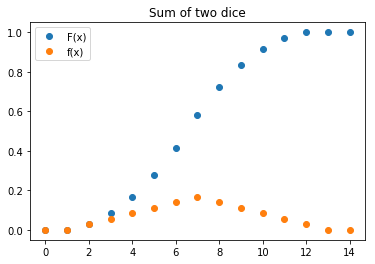

In [170]:
x = np.linspace(0,14,15);
CDF = np.array([0,0,1,3,6,10,15,21,26,30,33,35,36,36,36]) / 36;
PDF = np.array([0,0,1,2,3,4,5,6,5,4,3,2,1,0,0]) / 36;
plt.plot(x,CDF, "o", label="F(x)")
plt.plot(x,PDF, "o", label="f(x)")
plt.legend();
plt.title("Sum of two dice");

**Properties of the CDF:**

a) $F(\infty) = 1$ and $F(-\infty) = 0$. 

b) $x \leq y$ implies that $F(x) \leq F(x)$. Thus, $F$ is a non-decreasing function.

**Properties of the PDF:**

a) $\int_{-\infty}^\infty f_X(x) dx = 1$

b) $F_X(x) = \sum f_X(x)$, assuming $x$ takes on discrete values. 

**Def:** If $F_X$ is continuous and differentiable, then 

$$
f_X(x) = \frac{d}{dx}F_X(x) 
$$

and the above sum in (b) should be an integral. 

**Example:** Suppose that $T$ represents the waiting time for the radioactive decay of an atom. This can be modeled by an exponential distribution with parameter $\lambda$ with

$$
f_T(t) = \lambda e^{-\lambda t}
$$

when $t \geq 0$ and $0$ otherwise.

It can be checked that $f$ integrates to 1 over $[0,\infty)$ and the CDF is defined by

$$
F_X(t) = \int_0^\infty \lambda e^{-\lambda t} dt = 1 - e^{-\lambda t}. 
$$

**Note:** If $X$ is more than one dimensional, then the above definitions must be extended to $F(x_1, x_2, ... x_n)$. We will not cover that in these notes. The extension is straightforward, but requires a fair amount of book keeping.

## Functions of random variables

If $X$ is a random variable, we can make other random variables from $X$ such as $Y = X^2$ or $Z = 1/(1+X)$. Each of these new random variables also has a CDF and PDF. 

**Example:** Let $Y = X^2$ in the dice example. Then $Y$ is the square of the sum of the two dice. It has values $4$, $9$, $16$, $25$, $36$, and so on. For example, the probability that $Z$ is $36$ is the same as the probability that $X$ is $6$ which is $10/36$. 

**Example:** If $Y = T^2$ and the PDF of $T$ is exponentially distributed, then

\begin{eqnarray}
F_U(u) & = & P[U \leq u] = P[T^2 < u] \\
       & = & P[-\sqrt{u} \leq T \leq \sqrt{u}] \\
       & = & P[T \leq \sqrt{u}] \\
       & = & F_T(\sqrt{u}) \\
       & = & 1 - e^{-\lambda \sqrt{u}}. 
\end{eqnarray}

The third equality above is due to the fact that the probability $T$ is negative is $0$ for this particular distribution. 

To compute the PDF, we have

\begin{eqnarray}
f_U(u) & = & \frac{d}{dt} \left (1 - e^{-\lambda \sqrt{u}} \right ) \\
       & = & \frac{1}{2 \sqrt{u}} \lambda e^{-\lambda \sqrt{u}} .
\end{eqnarray}

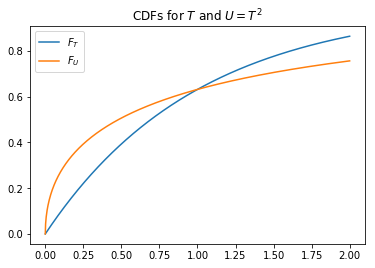

In [173]:
t = np.linspace(0,2,1000)
u = np.linspace(0,2,1000)
l = 1
plt.plot(t,1-np.exp(-l*t), label="$F_T$")
plt.plot(t,1-np.exp(-l*np.sqrt(u)), label="$F_U$")
plt.title("CDFs for $T$ and $U = T^2$")
plt.legend();

## Moments, means, and variances

**Def:** For a discrete system, the **expected value** of a random variable $X$ is 

$$
E[X] = \sum_x x \;f_X(x).
$$

For a real valued system, the **expected value** of a random variable $X$, also called the **mean** $\mu$ of $X$, is 

$$
\mu = E[X] = \int_{\infty}^\infty x \;f_X(x) dx.
$$

If $Y = g(X)$ is a function of the random variable $X$, then we can compute its expected value as well.

$$
E[Y] = E[g(X)] \int_{-\infty}^\infty y \;f_Y(x) dy. 
$$

It turns out that to compute $E[Y]$ you don't need $f_Y$. You can use:

$$
E[Y] = \int_{-\infty}^\infty g(x) \;f_X(x) dx . 
$$

**Example:** With the dice example and $X$ representing the sum of the two dice, we have

$$
E[X] = 2\cdot\frac{1}{36}
     + 3\cdot\frac{2}{36}
     + 4\cdot\frac{3}{36}
     + 5\cdot\frac{4}{36}
     + 6\cdot\frac{5}{36}
     + 7\cdot\frac{6}{36}
     + 8\cdot\frac{5}{36}
     + 9\cdot\frac{4}{36}
     + 10\cdot\frac{3}{36}
     + 11\cdot\frac{2}{36}     
     + 12\cdot\frac{1}{36} = 7.
$$

The expected value of the sum of the square is 

$$
E[X^2] = 2^2\cdot\frac{1}{36}
     + 3^2\cdot\frac{2}{36}
     + 4^2\cdot\frac{3}{36}
     + 5^2\cdot\frac{4}{36}
     + 6^2\cdot\frac{5}{36}
     + 7^2\cdot\frac{6}{36}
     + 8^2\cdot\frac{5}{36}
     + 9^2\cdot\frac{4}{36}
     + 10^2\cdot\frac{3}{36}
     + 11^2\cdot\frac{2}{36}     
     + 12^2\cdot\frac{1}{36} = 54.83.
$$

**Example:** The expected value of the exponential distribution is

$$
E[T] = \int_0^\infty t \lambda e^{-\lambda t} dt = \frac{1}{\lambda}. 
$$

Furthermore,

$$
E[T^2] = \int_0^\infty t \lambda e^{-\lambda t} dt = \frac{1}{\lambda} = \frac{2}{\lambda^2}. 
$$

**Def:** The **nth moment** of $X$ is $E[X^n]$. The **nth** central moment of $X$ is $E[(X-\mu)^n]$. The second central moment is also called the **variance** of $X$ and is denoted $\sigma^2$. The **standard deviation** of $X$ is $\sigma$. 

**Property:** 

$$
\sigma^2 = E[(X-\mu)^2] = E[X^2] - E[2\mu X] + E[\mu^2].
$$

Since $E[2\mu X] = 2\mu E[X] = 2 \mu^2$ we get

$$
\sigma^2 = E[(X-\mu)^2] = E[X^2] - \mu^2.
$$

**Example:** The variance of $X$ in the dice problem is $\sigma^2 = 54.83 - 49 = 5.83$. 

**Example:** The variance of the exponentially distributed $T$ is $\frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}$. The standard deviation is then $1 / \lambda$. 

In [168]:
l, t = sm.symbols("lambda,t")
sm.integrate(t * l * sm.exp(-l*t), (t,0,sm.oo)), sm.integrate(t**2 * l * sm.exp(-l*t), (t,0,sm.oo))

⎛⎧      1                                         π  ⎧      2                 
⎜⎪      ─         for │periodic_argument(λ, ∞)│ < ─  ⎪      ──         for │pe
⎜⎪      λ                                         2  ⎪       2                
⎜⎪                                                   ⎪      λ                 
⎜⎪∞                                                  ⎪                        
⎜⎨⌠                                                , ⎨∞                       
⎜⎪⎮      -λ⋅t                                        ⎪⌠                       
⎜⎪⎮ λ⋅t⋅ℯ     dt              otherwise              ⎪⎮    2  -λ⋅t            
⎜⎪⌡                                                  ⎪⎮ λ⋅t ⋅ℯ     dt         
⎜⎪0                                                  ⎪⌡                       
⎝⎩                                                   ⎩0                       

                         π⎞
riodic_argument(λ, ∞)│ < ─⎟
                         2⎟
                          ⎟
                  

# Discrete Time, Discrete State Markov Processes

## Discrete processes

**Def:** A **discrete random process** is a sequence of random variables $X_0$, $X_1$, ... $X_n$, ... that may be infinitely or finitely long.

**Def:** A **sample trajectory ** of a discrete random process is a sequence of samples for each of the random variables. 

**Example 1:** Roll a die over and over again and define $X_i$ to be the value of the roll number $i$. One possible trajectory is the sequence $1,1,1,1,1,\dots$ where all the dice turn up $1$ (which would be quite suspicious). 

**Example 2:** Roll a die over and over and let $Y_i$ be the sum of the rolls so far. An example trajectory is $1,2,3,4,...$, indicated a 1 each roll.

**Example 3:** Put three quarters, three dimes, three nickels, and three pennies in a jar. At each step, randomly remove a coin from the jar. Let $Z_i$ be the sum of the coins removed from the jar after $i$ steps. An example trajectory is:

$$
25, 50, 75, 80, 85, 90, 100, 110, 120, 121, 122, 123
$$

**Def:** The probability of a trajectory $(x_i)$ is 

$$
P[X_1 = x_1, X_2 = x_2, ...].
$$

**Example:** when rolling a die over and over again, the rolls are independent. Thus, 

$$
P[X_1 = x_1, X_2 = x_2, ...] = P[X_1-x_1]P[X_2=x_2] ... = \prod_{i=0}^\infty P[X_i=x_i].
$$

Note that since all these probabilities are less than one, the product above is zero for any particular infinite sequence of numbers. So the probability of getting a 1 forever is zero. In fact the probability of getting any particular sequence is zero.

We can obtain the probability of getting 100 ones in a row and then getting anything after that as

$$
\prod_{i=0}^{100} P[X_i=x_i] = 2.34 \times ⋅10^{−156} .
$$

**Note:** The set of trajectories starting with a particular finite sequence $w$ is denoted $\uparrow w$ and is called the **upset** of the sequence $w$. It can be shown that all measurable sets of sequences can be obtained from finite intersections and infinite unions of upsets. 


## The Markov property

**Def:** A process is **Markov** if 

$$
P[X_{k+1} = x_{k+1} \;|\; X_k = x_k, ..., X_0 = x_0 ] = P[X_{k+1} = x_{k+1} \;|\; X_k = x_k ].
$$

That is, the probability that the next state is equal to some value is dependent only on the current state.

**Example:** Example 1 above is Markov because all the rolls are independent. In fact, the probability that $X_{k+1}$ is equal to any particular value does not depend even on $X_k$. 

**Example:** Example 2 above is Markov. The sum of the rolls up to step $k+1$ depends on the sum at step $k$ and the roll at step $k+1$ only. 

**Example:** Example 3 above is not Markov. For example, suppose that the sum at step 2 is 30. This could have been obtained by drawing a quarter and a nickel, drawing three dimes, or two dimes and two nickels. In each of those cases, the probability that a given coin is going to be drawn in step three is different.
    






## Markov Processes as Graphs

**Def:** A Discrete time, discrete state Markov Process (also commonly called a Markov Chain) can be specified using a directed graph whose edges are labeled by a transition probability. In particular, let $G=(V,E)$ be a *directed* graph and let $Q:E \rightarrow [0,1]$ be such that for all $u \in V$

$$
\sum_{v \in \Gamma(v)} Q(u,v) = 1.
$$

With this specification, the state $X_i$ is a random variable whose values range over $V$ and

$$
P[X_{k+1} = v \;|\; X_k = u] = Q(u,v). 
$$

**Example:** Consider the following somewhat unrealistic model of the weather. It represents the following:

- $V = \{ 0, 1 \}$ representing sunny and rainy weather.
- $E = V \times V$ where $(u,v)$ represents the weather $v$ on day $2$ given the weather $u$ on day one.
- $Q(0,0) = 0.9$, $Q(0,1) = 0.1$, $Q(1,0) = 0.5$, and $Q(1,1) = 0.5$. 

<img src="images/mp1.jpeg" width=60%>

An example trajectory is

$$
0,0,0,0,1,1,1,1, ...
$$

Assuming all trajectories start with sun, the probability of trajectories with the same first eight states as the above is

$$
0.9^3 \cdot 0.1 \cdot 0.5^3 = 0.0015625. 
$$

## Properties of Markov Processes

**Def:** A Markov Process is called **irreducible** if it is there is a path from any state to any other state. Otherwise it is called **reducible**. 

**Def:** A state $x$ has **period** $k$ if starting in state $x$, if $x$ is returned to, it is returned to in $mk$ steps for some $m$. If $k=1$ for a given state, then it is called **aperiodic**. 

**Def:** A state is **transient** if there is a nonzero probability that it will not be returned to once left. Otherwise the state is called **recurrent**. 

**Def:** A state is called **absorbing** if it cannot be left once reached. A subset of states is also called **absorbing** if it cannot be left once reached. 

**Def:** A state is **ergodic** if it is aperiodic and there is a nonzero probability that it will be visited an infinite number of times in any trajectory.

**Example:** Consider the following Markov Processes:

<img src="images/Four-MPs.jpeg">

- In process (a): States 0 and 1 have period 2. State 2 is absorbing. The process is not irreducible. State 2 is ergodic. States 0 and 1 are transient.

- In process (b), all states have period 2. The set $\{2,3\}$ is absorbing. No states are ergodic. The system is not irreducible. States 0 and 1 are transient.

- In process (c), all states have period 3. The process is irreducible. No states are ergodic. All states are recurrent.

- In process (d), all states are aperiodic and ergodic.All states are recurrent.

## Update Matrix

**Def:** A **Stochastic Matrix** $Q$ is a real valued $n \times n$ matrix such that

- $Q_{i,j} \in [0,1]$
- The sum of each row is one. 

**Note:** The assignment $Q$ in a graph specification of a discrete time, discrete state Markov Process is a stochastic matrix. 

**Example:** The weather example above has 

$$
Q = \begin{pmatrix}
0.9 & 0.1 \\
0.5 & 0.5
\end{pmatrix} .
$$

**Def:** A **probability vector** $p \in [0,1]^n$ is a <u>row vector</u> such that 

$$
p\mathbb{1} = \mathbb{1}^T p^T = 1. 
$$

where $\mathbb{1}$ is the column vector of all ones.

**Property:** Let the probability vector $p_i$ correspond to the PDF $f_{X_i}$ for a Markov Process. Then,

$$
p_{k+1} = p_k Q. 
$$

**Example:** For the weather system, suppose that 

$$
p_0 = (1 \; 0)
$$

Then, 

$$
p_1 = (1\;0) \begin{pmatrix}
0.9 & 0.1 \\
0.5 & 0.5
\end{pmatrix} = (0.9 \;\; 0.1)
$$

and

$$
p_2 = (0.9 \;\; 0.1)
\begin{pmatrix}
0.9 & 0.1 \\
0.5 & 0.5
\end{pmatrix} = (0.86 \;\; 0.14).
$$

**Example:** Example (b) above has 

$$
Q = \begin{pmatrix}
0 & 1 & 0 & 0 \\
0.9 & 0   & 0.1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0   & 1 & 0 
\end{pmatrix} .
$$

Below is a simulation of the probability of being in each state versus time.

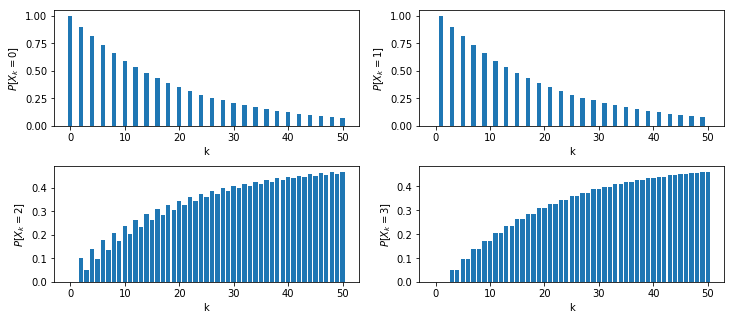

In [355]:
p = np.array([1,0,0,0]); # Initial probability vector
 
Q = np.array([           # Transition probability matrix
    [0,1,0,0],
    [0.9,0,0.1,0],
    [0,0,0.5,0.5],
    [0,0,0.5,0.5]
]);

n = 50;
x = [p]

for _ in range(n):
    p = p.dot(Q)   # Here's the update!
    x.append(p)

t = range(n+1)
x = np.array(x)

fig,ax = plt.subplots(2,2,figsize=(12,5))
plt.subplots_adjust(hspace=0.35)
for i in range(4):
    a = ax[int(i/2)][i%2]
    a.bar(t,x[:,i])
    a.set_ylabel("$P[X_k=%d]$" % i)
    a.set_xlabel("k");

## Properties of Stochastic Matrices

**Property:** $1$ is a eigenvalue with eigenvector $\mathbb{1}^T$. This is because every row sums to one. That is if $r$ is a row of $Q$, then $\mathbb{1}r = 1$. Said differently,
$$
Q \mathbb{1} = \mathbb{1}. 
$$

Note that the left and right eigenvectors of a matrix are the same, even though the eigenvalues may be different. Thus, $Q$ also has at least one left eigenvector of 1. 

**Def:** A **stationary probability vector $p^*$** has the property that

$$
p^* Q = p^*.
$$

Thus, $p^*$ is a left eigenvector of $Q$ with left eigenvalue 1. 

**Example:** Consider the weather example. The left eigenvalues and eigenvectors of 

$$
Q = \begin{pmatrix}
0.9 & 0.1 \\
0.5 & 0.5
\end{pmatrix} 
$$

are 

$$
\frac{2}{5} \; \mathrm{with} \; (-1\;\;1)
$$

and

$$
1 \; \mathrm{with} \; (5\;\;1).
$$

This second eigenvector corresponds to the stationary distribution, although it does not sum to one. However, since every non-zero multiple of an eigenvector is also an eigenvector, we get:

$$
p^* = (\frac{5}{6}\;\;\frac{1}{6}).
$$

So over the years, with this model, it is five times more likely to be sunny than rainy. Must not be Seattle!

**Example:** Consider the system (b) above with 

$$
Q = \begin{pmatrix}
0 & 1 & 0 & 0 \\
0.9 & 0   & 0.1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0   & 1 & 0 
\end{pmatrix} .
$$

It can be shown that a left eigenvector corresponding to $1$ is 

$$
p^* = (0 \; 0 \; \frac{1}{2} \; \frac{1}{2}).
$$

This makes sense, but it tricky to interpret. It is true the system is in state $2$ half the time at steady state, but only during even numbered time steps, which doesn't even really make sense at time equals infinity. 

**Example:** Suppose we have the system

<img src="images/2D-stationary.jpeg" width=60%>

which has 

$$
Q = \begin{pmatrix}
0 & 0.4 & 0.6 \\
0 & 1   & 0 \\
0 & 0 & 1 
\end{pmatrix} .
$$

The left eigenvalues of this system are $0$, $1$, and $1$. The $1$ eigenvalues of left eigenvectors $(0,1,0)$ and $(0,0,1)$. But can a process have two separate distributions?

No. Recall that if $x$ and $y$ are eigenvectors associated with the same eigenvalue, then so are $x+y$. Thus, the system has a two dimensional stationary state where all states have the form

$$
p^* = (0\;\; a \;\;\; 1-a)
$$

with $a \in [0,1]$. On the other hand it seems quite clear that the stationary state ought to be $(0\;\;0.4\;\;0.6)$. What is happening? In fact, the stationary analysis we did is valid, If you start with any probability vector of the form $(0\;\; a \;\;\; 1-a)$, then you will stay with that distribution as the system progresses, so they are all stationary. 

However, only one of the stationary vectors is *reachable* from the initial distribution $p = (1\;0\;0)$. To determine this vector, we need to use the update rule:

$$
p_{k+1} = p_k Q .
$$

Note that by substituting in $p_{k-1}Q$ and iterating, we can show that

$$
p_{k} = p_0 Q^k
$$

If we find $Q_k$ and take the limit as $k \rightarrow \infty$ we should find the steady state distribution. In this case, $Q^k = Q$, so $Q^\infty = Q$ (pretty unusual, so don't get used to this). Thus, 

$$
p^* = (1 \; 0 \; 0 ) Q = (0\;\;0.4\;\;0.6).
$$


In [343]:
# Eigensystem of the sun/rain system

Q = sm.Matrix([
    [sm.Rational(9,10), sm.Rational(1,10)],
    [sm.Rational(5,10), sm.Rational(5,10)]
])

(Q.T).diagonalize()

⎛⎡-1  5⎤, ⎡2/5  0⎤⎞
⎜⎢     ⎥  ⎢      ⎥⎟
⎝⎣1   1⎦  ⎣ 0   1⎦⎠

In [344]:
# Eigensystem of process (b) above

Q = sm.Matrix([
    [0,1,0,0],
    [sm.Rational(9,10), 0, sm.Rational(1,10), 0],
    [0,0,0,1],
    [0,0,1,0]
])

(Q.T).diagonalize()

⎛⎡0   0  3⋅√10   -3⋅√10⎤, ⎡-1  0     0       0  ⎤⎞
⎜⎢                     ⎥  ⎢                     ⎥⎟
⎜⎢0   0   -10     -10  ⎥  ⎢0   1     0       0  ⎥⎟
⎜⎢                     ⎥  ⎢                     ⎥⎟
⎜⎢-1  1  -3⋅√10  3⋅√10 ⎥  ⎢       -3⋅√10        ⎥⎟
⎜⎢                     ⎥  ⎢0   0  ───────    0  ⎥⎟
⎜⎣1   1    10      10  ⎦  ⎢          10         ⎥⎟
⎜                         ⎢                     ⎥⎟
⎜                         ⎢                3⋅√10⎥⎟
⎜                         ⎢0   0     0     ─────⎥⎟
⎝                         ⎣                  10 ⎦⎠

In [345]:
# Eignensystem with a 2D stationary set

Q = sm.Matrix([
    [0,sm.Rational(4,10),sm.Rational(6,10)],
    [0,1,0],
    [0,0,1]
])

(Q.T).diagonalize()

⎛⎡-5  0  0⎤, ⎡0  0  0⎤⎞
⎜⎢        ⎥  ⎢       ⎥⎟
⎜⎢2   1  0⎥  ⎢0  1  0⎥⎟
⎜⎢        ⎥  ⎢       ⎥⎟
⎝⎣3   0  1⎦  ⎣0  0  1⎦⎠

## Example: A Birth Death Process

Consider the infinite Markov process

<img src="images/birth-death-process
.jpeg" width=80%>

This process could describe a queuing model where at each step: with probability $p$ a new customer arrives, with probability $q$ a customer is serviced, and with the remaining probability seemingly nothing happens.

We wish to determine the mean number of customers at steady state, as well as the standard deviation of the number of customers. 

Abusing notation, let $p_i = p^*(i)$. Then at steady state

\begin{eqnarray}
p_0 & = & \alpha p_0 + \beta p_1 \\
p_1 & = & \alpha p_0 + \gamma p_1 + \beta p_2 \\
p_2 & = & \alpha p_1 + \gamma p_2 + \beta p_3 \\
    & \vdots &
\end{eqnarray}

where $\gamma = 1 - \alpha - \beta$. Solving the first equation for $p_1$ gives

$$
p_1 = \frac{\alpha}{\beta} p_0.
$$

Solving the second equation for $p_2$ and substituting in the above value for $p_1$ gives

$$
p_2 = \frac{\alpha^2}{\beta^2} p_0.
$$

In general, $p_k = \frac{\alpha^k}{\beta^k} p_0$. 

Now we use the fact that $\sum_{k=0}^\infty p_k = 1$ to get

$$
p_0 + \frac{\alpha}{\beta} p_0 + \frac{\alpha^2}{\beta^2} p_0 + \cdots = p_0 \sum_{k=0}^\infty \left ( \frac{\alpha}{\beta} \right ) ^ k = p_0 \frac{1}{1 - \frac{\alpha}{\beta}} = 1 .
$$

Thus, $p_0 = 1 - \frac{\alpha}{\beta}$. In order for this to be a valid probability, we clearly need that $\alpha \leq \beta$. Otherwise, the queue grows forever and there is no stationary distribution.

Now, the mean at steady state is

$$
\mu^* = \left (1 - \frac{\alpha}{\beta} \right ) \sum_{k=0}^\infty k \left ( \frac{\alpha}{\beta} \right )^k  = \left (1 - \frac{\alpha}{\beta} \right ) \frac{\alpha}{\beta(1-\frac{\alpha}{\beta})^2} = \frac{\alpha}{\beta - \alpha}. 
$$

We can also find the second moment, which is

$$
\mu^* = \left (1 - \frac{\alpha}{\beta} \right ) \sum_{k=0}^\infty k^2 \left ( \frac{\alpha}{\beta} \right )^k = \frac{\alpha(\alpha+\beta)}{(\alpha-\beta)^2} .
$$

The standard deviation is then

$$
\sigma = \sqrt{
\frac{\alpha}{\beta - \alpha} - \left (
\frac{\alpha(\alpha+\beta)}{(\alpha-\beta)^2} 
\right )^2
} .
$$



In [357]:
a,b,g,p0,p1,p2,p3 = sm.symbols("a b g p0 p1 p2 p3")
sm.solve(-p0 + a*p0 + b*p1, p1 )

⎡p₀⋅(-a + 1)⎤
⎢───────────⎥
⎣     b     ⎦

In [362]:
sm.simplify(sm.solve([-p0 + a*p0 + b*p1,-p1 + a*p0 + (1-a-b)*p1 + b*p2], [p1, p2] ))

⎧    p₀⋅(-a + 1)      -p₀⋅(a⋅b + (a - 1)⋅(a + b)) ⎫
⎪p₁: ───────────, p₂: ────────────────────────────⎪
⎨         b                         2             ⎬
⎪                                  b              ⎪
⎩                                                 ⎭

In [346]:
a, b, k = sm.symbols("a b k")
mu = sm.Sum(k*(a/b)**k, (k,0,sm.oo)).doit().args[0][0]*(1-a/b)
sm.simplify(mu)

 -a  
─────
a - b

In [347]:
mu2 = sm.Sum(k**2 * (a/b)**k, (k,0,sm.oo)).doit()
mu2 = mu2.args[0][0]
sm.simplify((1-a/b)*mu2)

a⋅(a + b)
─────────
        2
 (a - b) 

In [348]:
sm.simplify(mu2 - mu**2)

-a⋅(a⋅(a - b) + b⋅(a + b)) 
───────────────────────────
                 3         
          (a - b)          

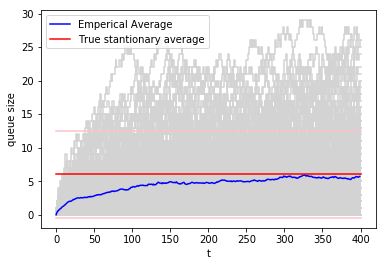

In [354]:
## Simulation of thebirth death process

a = 0.3
b = 0.35
g = 1-a-b
data = []

steps = 400

for i in range(200):
    x = 0
    traj = [x]
    for j in range(steps):
        r = random.random()
        if x == 0:
            if r < a:
                x = x + 1
        else:
            if r < a:
                x = x + 1
            elif r < a + b:
                x = x - 1
        traj.append(x)
    data.append(traj)
    plt.step(range(steps+1),traj,'lightgray')
    
data = np.array(data)
means = np.array(range(steps),dtype=np.float)
for i in range(steps):
    means[i] = np.mean(data[:,i])
    
plt.plot(means,'blue', label="Emperical Average")
mu = a / ( b - a )
mu2 = a*(a+b) / (a-b)**2
std = np.sqrt(mu2 - mu**2)
plt.plot([0,steps],[mu,mu],'red', label="True stantionary average");
plt.plot([0,steps],[mu-std,mu-std],'pink');
plt.plot([0,steps],[mu+std,mu+std],'pink');
plt.xlabel("t")
plt.ylabel("queue size")
plt.legend();

## Example: Gambler's Ruin

Suppose a gambler initially has one dollar. She places a bet against the house that she wins with probability $p$ and loses with probability $1-p$. If she wins, she gets another dollar, otherwise she looses the dollar. She continues this process until she either runs out of money or gets to the house limit of $N$ dollars. For example, if $N=5$, we get the following system:

$$
  1 
  \hookrightarrow 0
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 1 
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 2
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 3 
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 4
  \mathrel{\substack{p\\\rightleftarrows\\ 1-p}} 5
  \hookleftarrow
  1
$$

**States:**

- Absorbing: $0$ and $N$
- Transient States: $1$ through $N-1$
- Reducibile: No. 
- Communication Classes: $\{0\}$, $\{1,...,N-1\}$, $\{N\}$
- Periodicity: $1$ and $N$ have period $1$. All other states have period $2$. 
- Ergodic States: $0$ and $N$ are ergodic. 

**Trajectories:**

Once the state becomes $0$ or $5$, the system stays there.

**Probability Matrix:**

The probability matrix $P \in \mathbb{R}^{(N-1) \times (N-1)}$ with, for example, if $N = 5$, is given by 

$$
P = 
\begin{pmatrix}
1   & 1-p   & 0   & 0   & 0   & 0     \\
0   & 0   & 1-p   & 0   & 0   & 0     \\
0   & p   & 0     & 1-p & 0   & 0     \\
0   & 0   & p     & 0   & 1-p & 0     \\
0   & 0   & 0     & p   & 0   & 0     \\
0   &  0  & 0     & 0   & p   & 1   
\end{pmatrix}
$$

**Steady State Behavior:**

With this system, the equation

$$
P x = x
$$

has two solutions, meaning that $1$ is an eigenvalue with multiplicity 2. The eigenvectors associated with these two solutions are 

$$
u = \begin{pmatrix}
1 \\
\vdots \\
0
\end{pmatrix} \; \mathrm{and} \;
v = \begin{pmatrix}
0 \\
\vdots \\
1
\end{pmatrix} .
$$

Any combination of these two vectors is a steady state solution. If we would like to know what the probability of winning $N$ dollars, however, this analysis will not tell us. This is because the steady state depends on how much money the gambler starts with. If she starts with $N$ dollars, then the probability is $1$. If she starts with $N-1$ dollars, it is more complicated. 

To determine the steady state starting with $1$ dollar, we can argue as follows.

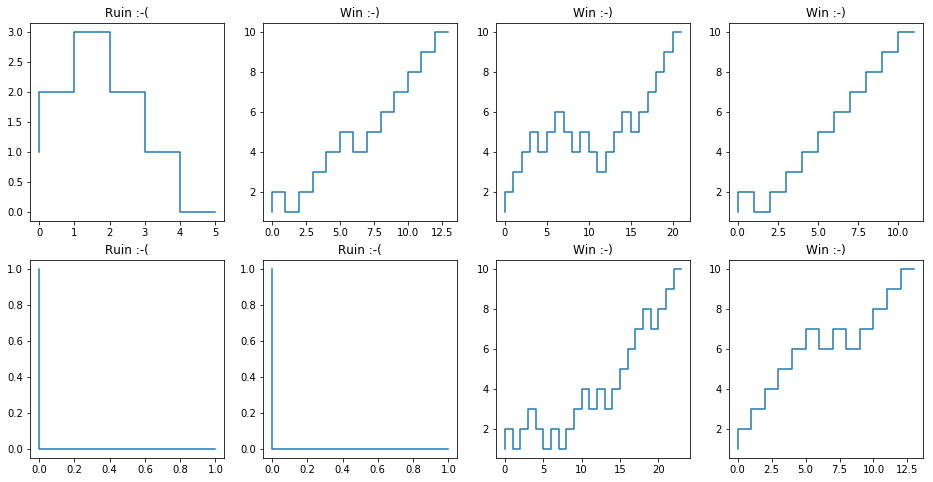

In [118]:
#
# Gambler's Ruin Simulation
#

def gamble(p,n):
    x = 1
    trajectory = [x]
    while x != 0 and x != n:
        if random.random() < p:
            x += 1
        else:
            x -= 1
        trajectory.append(x)
    return trajectory

p = 0.75
n = 10
gamble_trajectories,ax = plt.subplots(2,4,figsize=(16,8))

for i in range(8):
    x = gamble(p,n)
    t =range(len(x))
    a = ax[int(i/4)][i%4]
    a.step(t,x)
    if x[-1] == n:
        a.set_title("Win :-)")
    else:
        a.set_title("Ruin :-(")

(matrix([[0.65738116],
         [0.001121  ],
         [0.        ],
         [0.00440034],
         [0.        ],
         [0.00815309],
         [0.        ],
         [0.00988718],
         [0.        ],
         [0.00566244],
         [0.31339479]]), 0.3392158552348125)

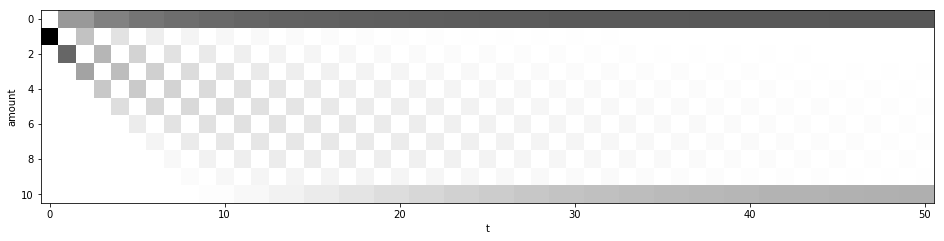

In [113]:
n = 10
prob = 0.6

P = np.zeros((n+1,n+1))
P[0,0] = 1
P[n,n] = 1
for i in range(n-1):
    P[i+2,i+1] = prob
    P[i,i+1] = 1-prob

p = np.zeros(n+1)
p[1] = 1

trajectory = [p]
for t in range(50):
    p = P.dot(p)
    trajectory.append(p)

trajectory = np.matrix(trajectory).transpose()
    
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(trajectory,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel("amount");

q = (1-prob)/prob
trajectory[:,-1], (1-q) / (1-q**n)

In [114]:
p = sm.symbols("p")
P = sm.Matrix([
    [1, 1-p, 0,   0,   0],
    [0, 0,   1-p, 0,   0],
    [0, p,   0,   1-p, 0],
    [0, 0,   p,   0,   0],
    [0, 0,   0,   p,   1]
])
P*P*P

⎡             2                    2               3      ⎤
⎢1  p⋅(-p + 1)  - p + 1    (-p + 1)        (-p + 1)      0⎥
⎢                                                         ⎥
⎢                                    2                    ⎥
⎢0           0           2⋅p⋅(-p + 1)          0         0⎥
⎢                                                         ⎥
⎢         2                                          2    ⎥
⎢0     2⋅p ⋅(-p + 1)           0         2⋅p⋅(-p + 1)    0⎥
⎢                                                         ⎥
⎢                           2                             ⎥
⎢0           0           2⋅p ⋅(-p + 1)         0         0⎥
⎢                                                         ⎥
⎢            3                 2         2                ⎥
⎣0          p                 p         p ⋅(-p + 1) + p  1⎦

In [117]:
P.subs(p,sm.Rational(1,2)).diagonalize()

⎛⎡            √2 + 2       -√2 + 2    ⎤                     ⎞
⎜⎢-1  1  0  ──────────   ──────────── ⎥, ⎡0  0  0   0    0 ⎤⎟
⎜⎢            ⎛√2    ⎞     ⎛  √2    ⎞ ⎥  ⎢                 ⎥⎟
⎜⎢          2⋅⎜── + 1⎟   2⋅⎜- ── + 1⎟ ⎥  ⎢0  1  0   0    0 ⎥⎟
⎜⎢            ⎝2     ⎠     ⎝  2     ⎠ ⎥  ⎢                 ⎥⎟
⎜⎢                                    ⎥  ⎢0  0  1   0    0 ⎥⎟
⎜⎢2   0  0    -2 - √2       -2 + √2   ⎥  ⎢                 ⎥⎟
⎜⎢                                    ⎥  ⎢         -√2     ⎥⎟
⎜⎢0   0  0  √2⋅(√2 + 2)  -√2⋅(-√2 + 2)⎥  ⎢0  0  0  ────  0 ⎥⎟
⎜⎢                                    ⎥  ⎢          2      ⎥⎟
⎜⎢-2  0  0    -2 - √2       -2 + √2   ⎥  ⎢                 ⎥⎟
⎜⎢                                    ⎥  ⎢               √2⎥⎟
⎜⎣1   0  1       1             1      ⎦  ⎢0  0  0   0    ──⎥⎟
⎝                                        ⎣               2 ⎦⎠

# The Page Rank Algorithm

Describe algorithm here.

In [208]:
# Create a Random Graph

n = 100
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from([
    (np.random.randint(n),np.random.randint(n)) 
    for _ in rangfre(int(1.1*n))
])

In [209]:
# Find the ranking of all nodes, and the max ranged node

vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)
max(vals),m

(0.023662036660496318, 48)

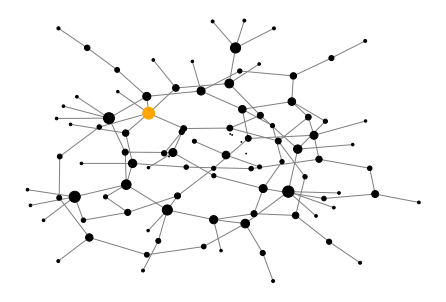

In [249]:
# Draw the network

nx.draw(G, 
        with_labels=False, 
        node_color=['black' if k != m else 'orange' for k in range(n)],
        edge_color='gray',
        node_size=(500*vals)**2,
        node_shape='o',
        pos=nx.kamada_kawai_layout(G))

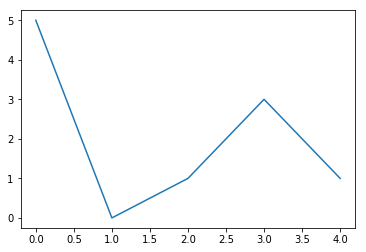

In [260]:
M = nx.laplacian_matrix(G)
M = np.matrix(M.toarray())
eigs = np.linalg.eigvals(M)
mags = [abs(e) for e in eigs]
y = plt.plot(mags)